In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# datasets = ["Reserve_MDP_81_6", "Reserve_MDP_243_7", "Reserve_MDP_729_8", "Reserve_MDP_2187_9"]
datasets = ["Reserve_MDP_729_8_cv5", "Reserve_MDP_729_8_cv3"]
models = ["GCN_accuracy", "GCN_accuracy_weighted"]
results = ["training_loss", "test_loss", "test_gap", "test_error", "test_recall", "test_accuracy"]
max_epoch = 3000

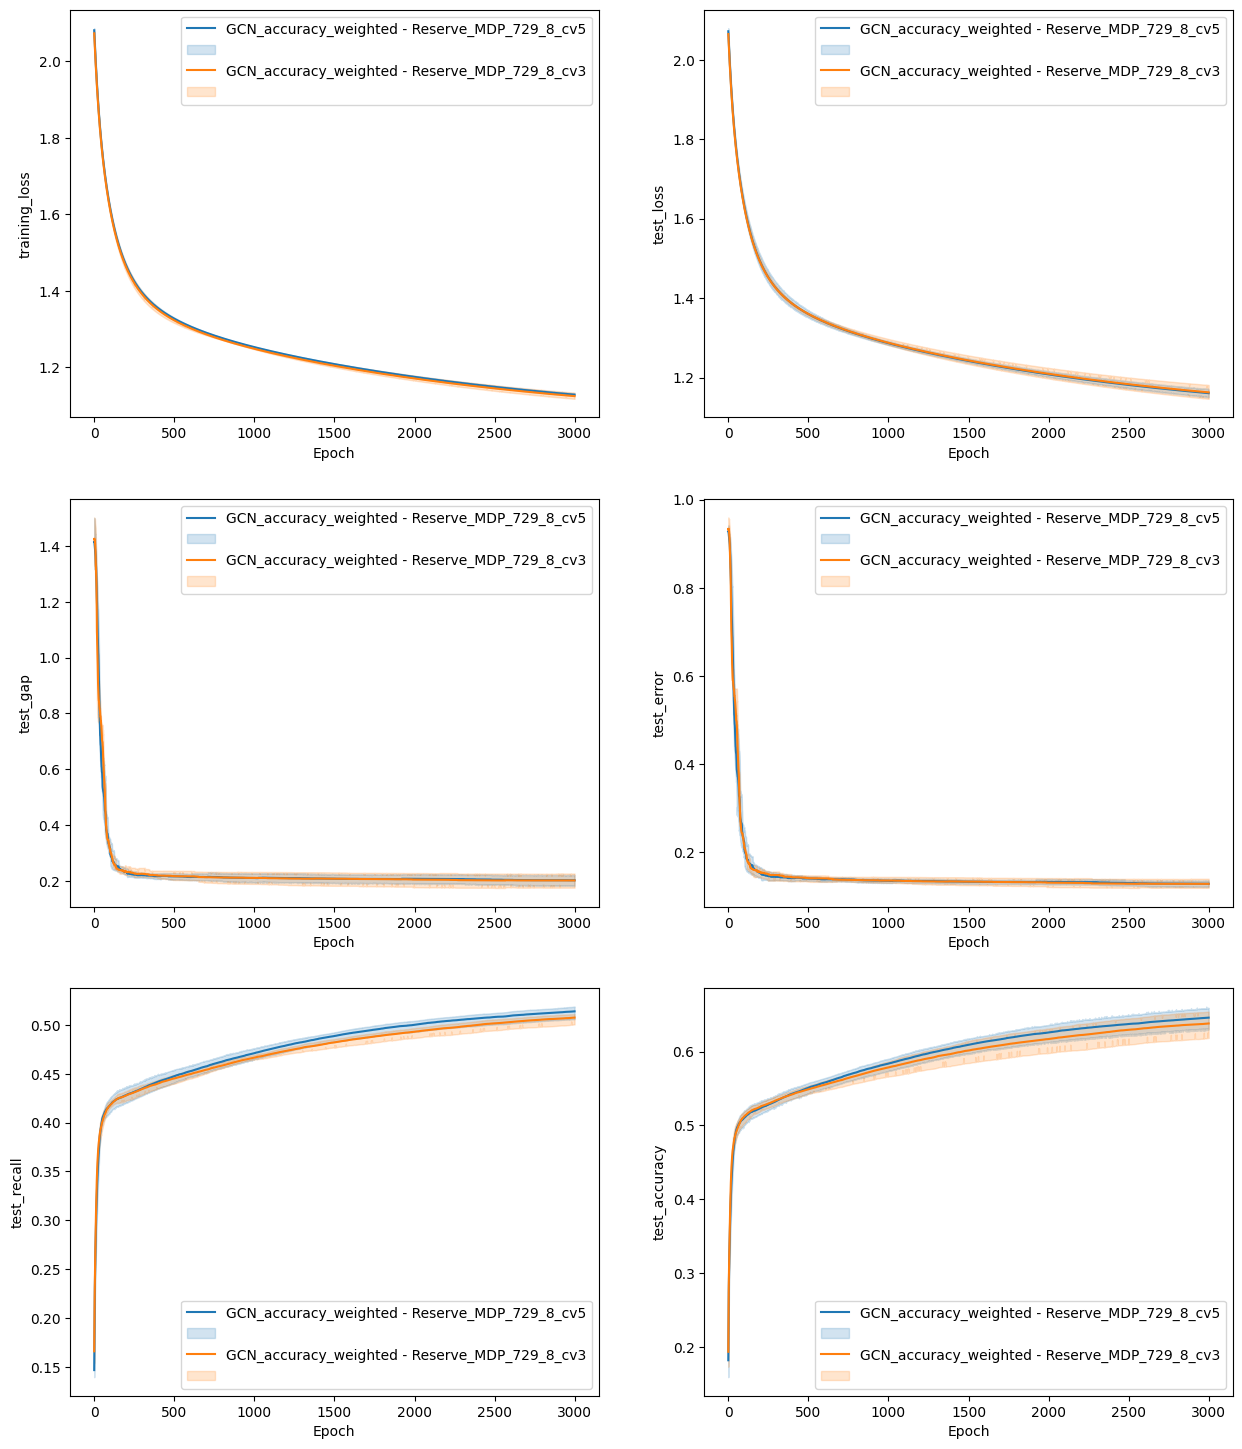

In [3]:
n_plots = 5
n_cols = 2
n_rows = int((n_plots + n_plots%2)/2)

fig, ax = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 6*n_rows))

count = 0
for result in results:
    col = count %2
    row = count //2 
    count += 1
    legend = []
    for model in models:
        for dataset in datasets:
            
            df = pd.read_csv(f"Results/{model}/{dataset}/{result}.csv", index_col=0)

            df_long = df[df.index < max_epoch].stack()
            df_long.index = df_long.index.to_flat_index().map(lambda x: x[0])
            sns.lineplot(df_long, errorbar='ci', ax=ax[row, col])
            ax[row, col].set_ylabel(result)
            ax[row, col].set_xlabel("Epoch")

            legend.append(f"{model} - {dataset}")
            legend.append("")
    ax[row, col].legend(legend)

In [9]:
from collections import defaultdict

In [10]:
final_values = defaultdict(dict)
for result in results:
    col = count %2
    row = count //2 
    count += 1
    legend = []
    for model in models:
        for dataset in datasets:
            df = pd.read_csv(f"Results/{model}/{dataset}/{result}.csv", index_col=0)
            final_values[f"{model}-{dataset}"][result] = f"{df.iloc[-1].mean():.4f} +- {1.96*df.iloc[-1].std()/np.sqrt(df.iloc[-1].size):.4f}"
    #     break
    # break


In [11]:
final_df = pd.DataFrame(final_values).T
final_df.index = pd.MultiIndex.from_tuples(list(final_df.index.map(lambda x: x.split("-"))))

In [12]:
final_df[["test_gap", "test_error", "test_recall", "test_accuracy"]]

test_gap  \
GCN_accuracy          Reserve_MDP_729_8_cv5  0.2058 +- 0.0180   
                      Reserve_MDP_729_8_cv3  0.2072 +- 0.0294   
GCN_accuracy_weighted Reserve_MDP_729_8_cv5  0.2024 +- 0.0214   
                      Reserve_MDP_729_8_cv3  0.2017 +- 0.0287   

                                                   test_error  \
GCN_accuracy          Reserve_MDP_729_8_cv5  0.1328 +- 0.0084   
                      Reserve_MDP_729_8_cv3  0.1337 +- 0.0126   
GCN_accuracy_weighted Reserve_MDP_729_8_cv5  0.1287 +- 0.0080   
                      Reserve_MDP_729_8_cv3  0.1285 +- 0.0119   

                                                  test_recall  \
GCN_accuracy          Reserve_MDP_729_8_cv5  0.4921 +- 0.0125   
                      Reserve_MDP_729_8_cv3  0.4820 +- 0.0171   
GCN_accuracy_weighted Reserve_MDP_729_8_cv5  0.5140 +- 0.0077   
                      Reserve_MDP_729_8_cv3  0.5076 +- 0.0069   

                                                test_accuracy  
GCN_accuracy          Reserve_MDP_729_8_cv5  0.6220 +- 0.0247  
                      Reserve_MDP_729_8_cv3  0.6106 +- 0.0370  
GCN_accuracy_weighted Reserve_MDP_729_8_cv5  0.6460 +- 0.0164  
                      Reserve_MDP_729_8_cv3  0.6381 +- 0.0205